In [1]:
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [4]:
#from sklearn.preprocessing import MinMaxScaler
#x_Train_normalize = MinMaxScaler().fit_transform(x_Train)
#x_Test_normalize = MinMaxScaler().fit_transform(x_Test)
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [5]:
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model=Sequential()

In [8]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [9]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0271 - acc: 0.9933 - val_loss: 0.0862 - val_acc: 0.9736
Epoch 2/10
 - 1s - loss: 0.0220 - acc: 0.9951 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 3/10
 - 1s - loss: 0.0188 - acc: 0.9956 - val_loss: 0.0803 - val_acc: 0.9761
Epoch 4/10
 - 1s - loss: 0.0159 - acc: 0.9970 - val_loss: 0.0783 - val_acc: 0.9755
Epoch 5/10
 - 1s - loss: 0.0128 - acc: 0.9978 - val_loss: 0.0780 - val_acc: 0.9767
Epoch 6/10
 - 1s - loss: 0.0104 - acc: 0.9986 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 7/10
 - 1s - loss: 0.0086 - acc: 0.9990 - val_loss: 0.0798 - val_acc: 0.9766
Epoch 8/10
 - 1s - loss: 0.0075 - acc: 0.9993 - val_loss: 0.0795 - val_acc: 0.9779
Epoch 9/10
 - 1s - loss: 0.0065 - acc: 0.9993 - val_loss: 0.0807 - val_acc: 0.9778
Epoch 10/10
 - 1s - loss: 0.0060 - acc: 0.9993 - val_loss: 0.0816 - val_acc: 0.9782


In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

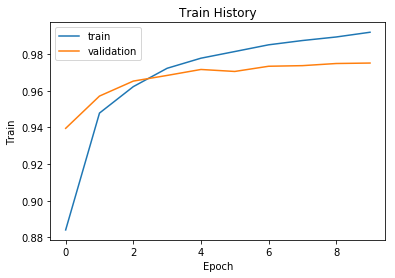

In [15]:
show_train_history(train_history,'acc','val_acc')

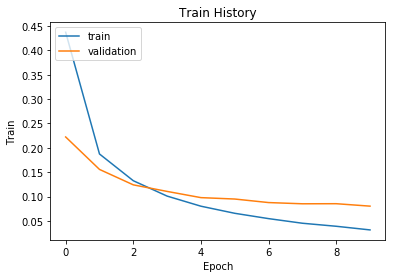

In [16]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores=model.evaluate(x=x_Test_normalize,y=y_Test_OneHot)
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 24us/step
accuracy= 0.9775


In [27]:
prediction=model.predict_classes(x_Test_normalize)

In [28]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

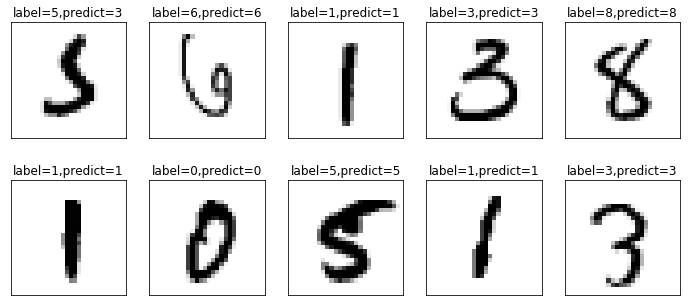

In [29]:
def plot_images_labels_prediction(images,labels,prediction,idx,num):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        numn=25
    for i in range(0, num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.imshow
plot_images_labels_prediction(x_test_image,y_test_label,prediction,340,10)

In [30]:
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,966,0,2,1,2,3,2,1,2,1
1,0,1125,4,0,0,1,2,0,3,0
2,5,1,1009,2,3,1,2,4,5,0
3,0,0,5,988,1,4,0,1,4,7
4,1,0,0,1,972,0,3,1,1,3
5,2,0,0,7,2,870,5,0,2,4
6,4,3,1,1,9,6,932,0,2,0
7,0,5,11,5,4,1,0,993,2,7
8,1,0,5,8,6,4,1,2,943,4


In [37]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})

In [38]:
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [39]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2810,5,3
3702,5,3
4355,5,3
5937,5,3
5972,5,3


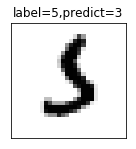

In [41]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,340,1)